# Code to Run LIME on CNN + Spatial Attention




### Mounting Google drive to read dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Paths to be defined here

In [2]:
'''
Declare all paths which are used to trian and save
'''
# Path to saved dataset which is already created for real world
dataset_path = '/content/drive/MyDrive/GSMP2/processed_data.npz'
# Path for best model which is saved
best_cnn_model_path = "/content/drive/MyDrive/GSMP2/best_model.h5"

In [3]:

import numpy as np

data = np.load(dataset_path)

# Extracting the datasets
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']
x_val = data['x_val']
y_val = data['y_val']

In [4]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=48ca52274b12dbc67cde4f9af276e082f295a5706457a126ee9d7a788033ee5c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [5]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model(best_cnn_model_path)

In [6]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

explainer = lime_image.LimeImageExplainer()


In [7]:
def explain_model_prediction(index, model, images, labels):
    # Explain prediction
    explanation = explainer.explain_instance(images[index].astype('double'), model.predict, top_labels=5, hide_color=0, num_samples=1000)

    # Get the label with the highest probability
    label = explanation.top_labels[0]

    # Show the image
    plt.figure(figsize=(8, 8))
    plt.imshow(images[index])
    plt.title(f'Original Image - Predicted Label: {label}')
    plt.axis('off')

    # Show the explanation for the top label
    temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=5, hide_rest=False)
    plt.figure(figsize=(8, 8))
    plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
    plt.title(f'Explanation for Label {label}')
    plt.axis('off')

    return explanation

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 20ms/step


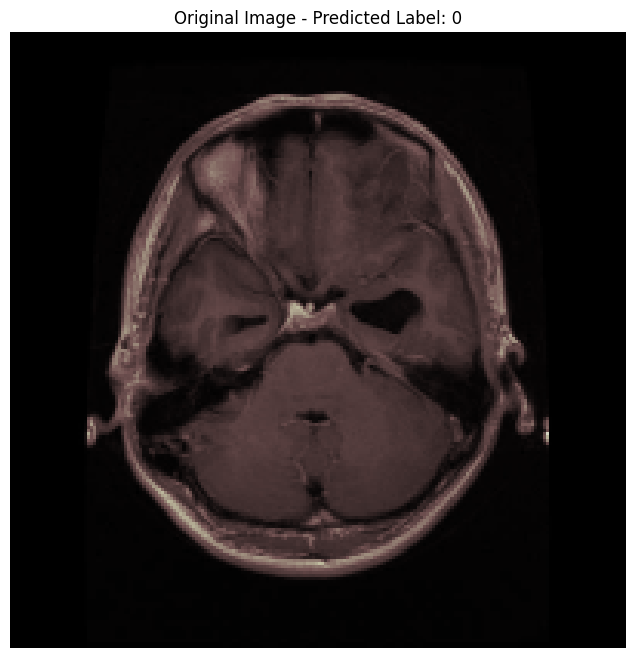

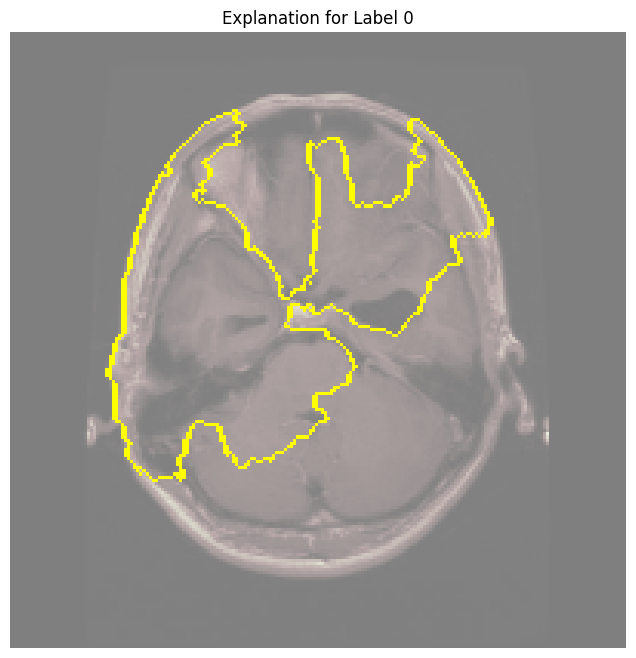

In [13]:
explanation = explain_model_prediction(4, model, x_test, y_test)

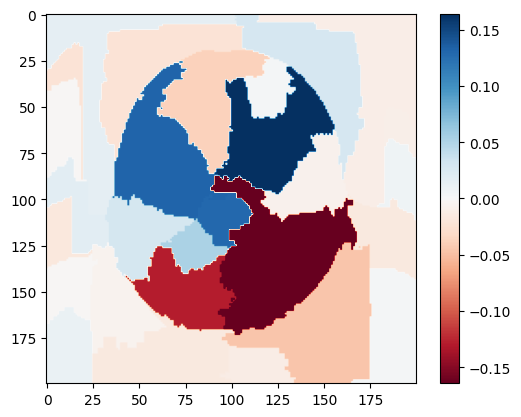

In [14]:
ind =  explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar();

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 19ms/step


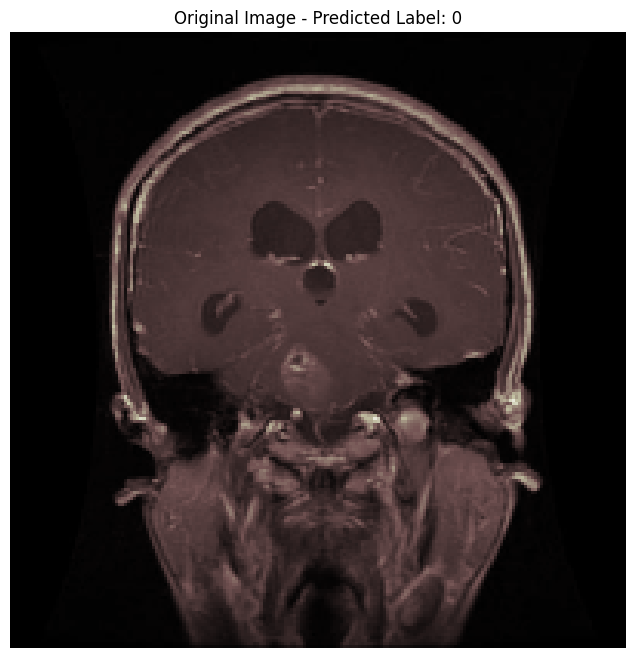

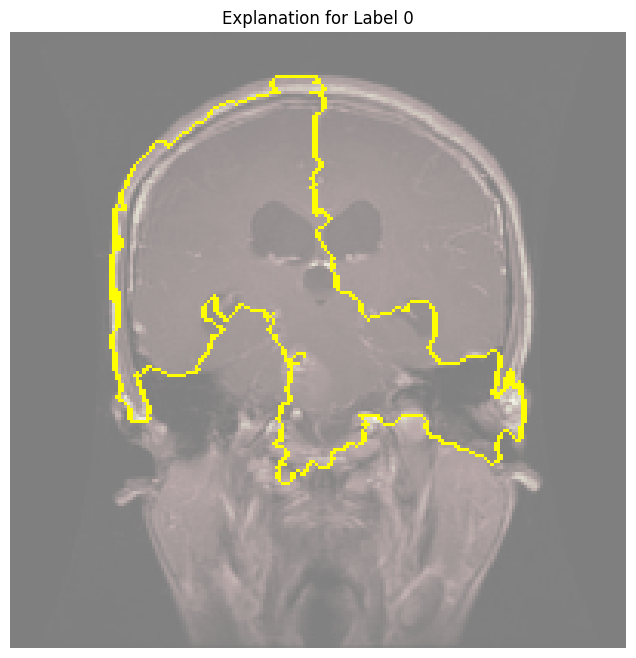

In [25]:
explanation = explain_model_prediction(123, model, x_test, y_test)

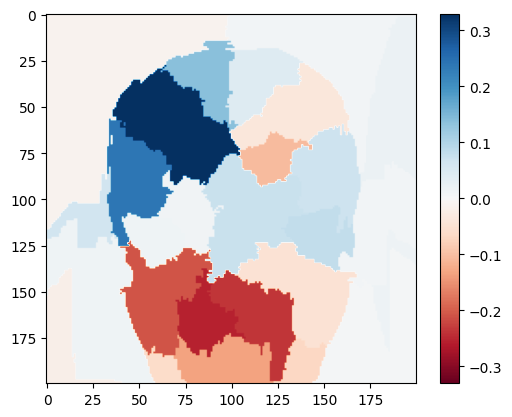

In [26]:
ind =  explanation.top_labels[0]
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments)
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar();